In [1]:
import re
import string
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

1. Escreva uma função que recebe uma senha como entrada e verifica
se ela atende aos seguintes critérios de uma senha forte:
<br>
• Pelo menos 8 caracteres
<br>
• Pelo menos uma letra maiúsculas e uma letra minúscula
<br>
• Pelo menos um dígito
<br>
• Pelo menos um caractere especial (por exemplo, !@#$%&*)
<br>

A função deve retornar True se a senha for forte e False caso contrário. Mostre exemplos.

In [2]:
def password(psw):
    if len(psw) >= 8 and re.search(r'[A-Z]', psw) and re.search(r'[a-z]', psw) and re.search(r'\d', psw) and re.search(r'[!@#$%&*]', psw):
        return True
    return False

print(password("yug342%"))
print(password("H87avsd$"))
print(password("H87avsd"))
print(password("h45bAAADSUh"))
print(password("h45bAAADSUh%"))

False
True
False
False
True


2. Escreva uma função que recebe um endereço de e-mail como entrada e verifica se ele é válida de acordo com as regras básicas de formação de um e-mail. Utilize expressões regulares para realizar a validação. A função deve retornar True se o endereço de e-mail for válido e False caso contrário.
Mostre exemplos.

In [3]:
def is_email_valid(email):
    return re.match(r'^[\w\.-]+@[\w\.-]+\.[\w\.-]', email) is not None

print(is_email_valid("a-.678sAt_@hotmail"))
print(is_email_valid("a-.678sAt_@hotmail.com"))
print(is_email_valid("a-.678sAt_hotmail.br"))
print(is_email_valid("a-.678sAt_@hotmail."))

False
True
False
False


3. Considere o seguinte exemplo de referência de livro em formato de citação APA:

Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of
statistical natural language processing. MIT press.

Implemente uma função usando expressões regulares que extraia cada autor, ano de publicação, título e editora do livro, para qualquer referência de livro neste formato.

In [4]:
def reference(data):
  pattern = r'(?P<authors>[\w\s\.\,\&]+) (?P<year>\(\d+\)). (?P<title>(\w*\s*)+). (?P<company>(\w*\s*)+).'
  for x in re.compile(pattern).finditer(data):

    temp = re.compile(r'\w+,\s[A-Z. ]+').findall(x.group('authors'))
    print('Autores:', temp)
    print(f'Ano de publicação: {x.group("year")}')
    print(f'Título: {x.group("title")}')
    print(f'Editora do livro: {x.group("company")}\n')

reference('Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press.')

Autores: ['Manning, C. D.', 'Manning, C. D.', 'Schutze, H.']
Ano de publicação: (1999)
Título: Foundations of statistical natural language processing
Editora do livro: MIT press



4. Usando sua base de textos, determine a distribuição de comprimentos dos textos (em quantidade de palavras), listando estas quantidades e plotando um histograma.

In [5]:
df = pd.read_csv('archive/data.csv')
df = df.dropna(subset=['description'])
ch_sizes = [len(x) for x in df['description']]
print(ch_sizes)

[448, 611, 314, 859, 701, 552, 387, 635, 774, 463, 603, 775, 480, 678, 148, 460, 594, 770, 758, 861, 471, 80, 576, 419, 209, 149, 930, 684, 608, 782, 2046, 542, 708, 1, 474, 752, 874, 680, 848, 204, 599, 47, 97, 11, 155, 623, 75, 888, 394, 812, 464, 616, 194, 3714, 123, 822, 136, 341, 925, 673, 105, 735, 635, 118, 787, 940, 852, 865, 675, 315, 694, 668, 715, 993, 1086, 292, 271, 697, 802, 577, 582, 800, 100, 408, 778, 1000, 726, 704, 511, 257, 709, 33, 625, 605, 680, 661, 135, 914, 505, 340, 215, 526, 924, 201, 803, 799, 702, 749, 890, 1, 571, 533, 759, 636, 569, 861, 137, 730, 133, 556, 1136, 565, 614, 809, 1576, 582, 116, 420, 1095, 725, 522, 347, 458, 583, 649, 89, 86, 566, 47, 927, 387, 1840, 763, 147, 742, 791, 787, 201, 142, 545, 583, 680, 856, 1081, 543, 58, 542, 588, 289, 772, 183, 106, 62, 558, 113, 674, 248, 826, 587, 185, 495, 250, 722, 133, 679, 688, 398, 234, 428, 564, 102, 376, 830, 449, 548, 103, 813, 634, 739, 54, 747, 72, 728, 534, 475, 582, 392, 679, 843, 558, 380, 10

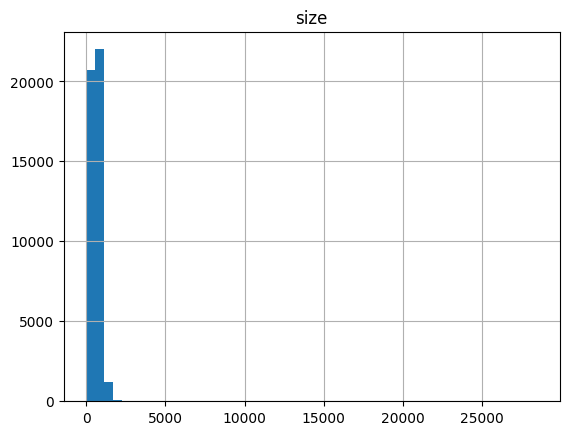

In [6]:
df = pd.DataFrame({
    'size': ch_sizes,
})
hist = df.hist(bins=50)

5. Aplique os seguintes passos de pré-processamento aos textos:
<br>
• Remova todas as palavras que contém número;
<br>
• Converta as palavras para minúsculas;
<br>
• Remova pontuação;
<br>
• Tokenize os textos em palavras, gerando um dicionário ́unico com n
tokens e convertendo cada texto em um vetor de dimensão n com a
respectiva contagem de palavras.
<br>
Em seguida, encontre as 10 palavras mais frequentes da base de textos.

In [7]:
df = pd.read_csv('archive/data.csv')
df = df.dropna(subset=['description'])

df['description'] = df['description'].apply(lambda row: re.sub(r'\d', '', row).lower())
df['description'] = df['description'].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))
df['tokenized'] = df['description'].apply(lambda row: nltk.word_tokenize(row))

df['description'][0]

'round toed black sports shoes with red accents low top styling and central laceups leather upper with stitched detail overlay formstrip and ducati branding on the sides\xa0and reinforced heel collar with branding soft tongue and inner branding on the tongue cushioned footbed with branding at the heel printed detail at the midsole textured rubber outsole with patterned grooves and branding warranty  months against manufacturing defects only'

In [8]:
all_words = [y for x in df['tokenized'] for y in x]
freq = nltk.FreqDist(all_words)
freq

FreqDist({'and': 166716, 'the': 156365, 'with': 127680, 'a': 127468, 'for': 73034, 'on': 69236, 'of': 60115, 'in': 59653, 'to': 59279, 'this': 43691, ...})

In [9]:
for i, (word, f) in enumerate(freq.most_common(10)):
    if i == 10: break
    print(f'word: {word}  |  frequency: {f}')

word: and  |  frequency: 166716
word: the  |  frequency: 156365
word: with  |  frequency: 127680
word: a  |  frequency: 127468
word: for  |  frequency: 73034
word: on  |  frequency: 69236
word: of  |  frequency: 60115
word: in  |  frequency: 59653
word: to  |  frequency: 59279
word: this  |  frequency: 43691


6. Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:
<br>
• Remova stopwords;
<br>
• Realize rotulação de POS;
<br>
• Realize stemização;
<br>
a) Exiba os resultados em alguns textos.
<br>
b) Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão anterior.
<br>
c) Repita a letra b) usando os tokens stemizados.
<br>
d) Verifique quais são as classes gramaticais mais frequentes.

In [10]:
stop_words = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.PorterStemmer()
print(df['description'][0])
df['description2'] = df['description'].apply(lambda row: [x for x in nltk.word_tokenize(row) if x not in stop_words])
df['description2'] = df['description2'].apply(lambda row: [stemmer.stem(x) for x in row])
df['description2'] = df['description2'].apply(lambda row: nltk.pos_tag(row))

' '.join([x[0] for x in df['description2'][0]])

round toed black sports shoes with red accents low top styling and central laceups leather upper with stitched detail overlay formstrip and ducati branding on the sides and reinforced heel collar with branding soft tongue and inner branding on the tongue cushioned footbed with branding at the heel printed detail at the midsole textured rubber outsole with patterned grooves and branding warranty  months against manufacturing defects only


'round to black sport shoe red accent low top style central laceup leather upper stitch detail overlay formstrip ducati brand side reinforc heel collar brand soft tongu inner brand tongu cushion footb brand heel print detail midsol textur rubber outsol pattern groov brand warranti month manufactur defect'

In [11]:
all_words = [y for x in df['tokenized'] for y in x]
freq = nltk.FreqDist(all_words)

all_words2 = [y for x in df['description2'] for y in x]
freq2 = nltk.FreqDist(all_words2)

for i, (word, f) in enumerate(freq.most_common(10)):
    if i == 10: break
    print(f'word: {word}  |  frequency: {f} ### word2: {freq2.most_common(10)[i][0]}  |  frequency2: {freq2.most_common(10)[i][1]}')

word: and  |  frequency: 166716 ### word2: ('wash', 'NN')  |  frequency2: 37527
word: the  |  frequency: 156365 ### word2: ('style', 'NN')  |  frequency2: 36585
word: with  |  frequency: 127680 ### word2: ('comfort', 'NN')  |  frequency2: 32130
word: a  |  frequency: 127468 ### word2: ('care', 'NN')  |  frequency2: 27729
word: for  |  frequency: 73034 ### word2: ('dri', 'NN')  |  frequency2: 24320
word: on  |  frequency: 69236 ### word2: ('iron', 'NN')  |  frequency2: 21511
word: of  |  frequency: 60115 ### word2: ('model', 'NN')  |  frequency2: 21503
word: in  |  frequency: 59653 ### word2: ('brand', 'NN')  |  frequency2: 20109
word: to  |  frequency: 59279 ### word2: ('cotton', 'NN')  |  frequency2: 19930
word: this  |  frequency: 43691 ### word2: ('detail', 'NN')  |  frequency2: 18758


In [12]:
pos_freq = nltk.FreqDist(t for w, t in all_words2)

for i, (pos, f) in enumerate(pos_freq.most_common(10)):
    if i == 10: break
    print(f'pos: {pos}  |  frequency: {f}')

pos: NN  |  frequency: 1706255
pos: JJ  |  frequency: 573560
pos: VBP  |  frequency: 74287
pos: VBD  |  frequency: 69826
pos: IN  |  frequency: 44335
pos: RB  |  frequency: 38789
pos: VB  |  frequency: 32255
pos: CD  |  frequency: 25287
pos: NNS  |  frequency: 25161
pos: JJS  |  frequency: 14359


7. Escolha 5 documentos da sua base pré-processada, e determine seu
documento mais parecido, dentre todos os documentos da base (não pode
ser ele mesmo), usando:
<br>
a) Representação vetorial CountVectorizer com similaridade do cosseno;
<br>
b) Representação vetorial TF-IDF com similaridade do cosseno.
<br>
Justifique, para cada par de documentos mais parecidos, porque cada representação considerou o par semelhante.

In [13]:
df = pd.read_csv('archive/data.csv')
df = df.dropna(subset=['description'])

stop_words = set(nltk.corpus.stopwords.words("english"))

df['description'] = df['description'].apply(lambda row: re.sub(r'\d', '', row).lower())
df['description'] = df['description'].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))

temp = df['description'].apply(lambda row: [x for x in nltk.word_tokenize(row) if x not in stop_words])
df['description'] = temp.apply(lambda x: " ".join(x))

sample = df['description'].sample(5)
idxs = sample.index.tolist()

count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(df['description'])

tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(df['description'])

for idx in idxs:
    print(f'Texto base: {df["description"][idx][:200]}')

    similarities = cosine_similarity(count_matrix[idx], count_matrix).flatten()
    similarities[idx] = -1
    most_similar = np.argmax(similarities)
    print(f'Texto mais similar (CountVectorizer): {df["description"][most_similar][:200]}')

    similarities = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    similarities[idx] = -1
    most_similar = np.argmax(similarities)
    print(f'Texto mais similar (TF-IDF): {df["description"][most_similar][:200]}')

Texto base: navy blue bag colourful word print two handles foldable bag comes buttonable loop secure rolled bag easy roll design portability
Texto mais similar (CountVectorizer): style note accessorising well marks true fashionista scarf definitely mark one pair contrasting jacket sharpen casual look formal shirt trendy fashionable look product details green light weight scarf
Texto mais similar (TF-IDF): style note accessorising well marks true fashionista scarf definitely mark one pair contrasting jacket sharpen casual look formal shirt trendy fashionable look product details green light weight scarf
Texto base: style note epitomize colin farrells street cred revv ring style heavy duty spiked leather bracelets versatile piece jewellery style resonate contemporary hip hop fashion wear add twist individuality d
Texto mais similar (CountVectorizer): composition synthetic leather black cobalt sandals rubber outsole loaded subtle stylish embossing pair sandals adidas looks great kinds clo